In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Basic data info
print("Feature names:", data.feature_names)
print("\nClass distribution:\n", y.value_counts())

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Class distribution:
 1    71
0    59
2    48
Name: count, dtype: int64


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluation
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Adjusted Rand Index:", kmeans_ari)


K-Means Silhouette Score: 0.2848589191898987
K-Means Adjusted Rand Index: 0.8974949815093207


In [7]:
#import sys
#!{sys.executable} -m pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

# Apply K-Medoids
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Evaluation
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

print("K-Medoids Silhouette Score:", kmedoids_silhouette)
print("K-Medoids Adjusted Rand Index:", kmedoids_ari)


K-Medoids Silhouette Score: 0.26597740204536796
K-Medoids Adjusted Rand Index: 0.7263406645756675


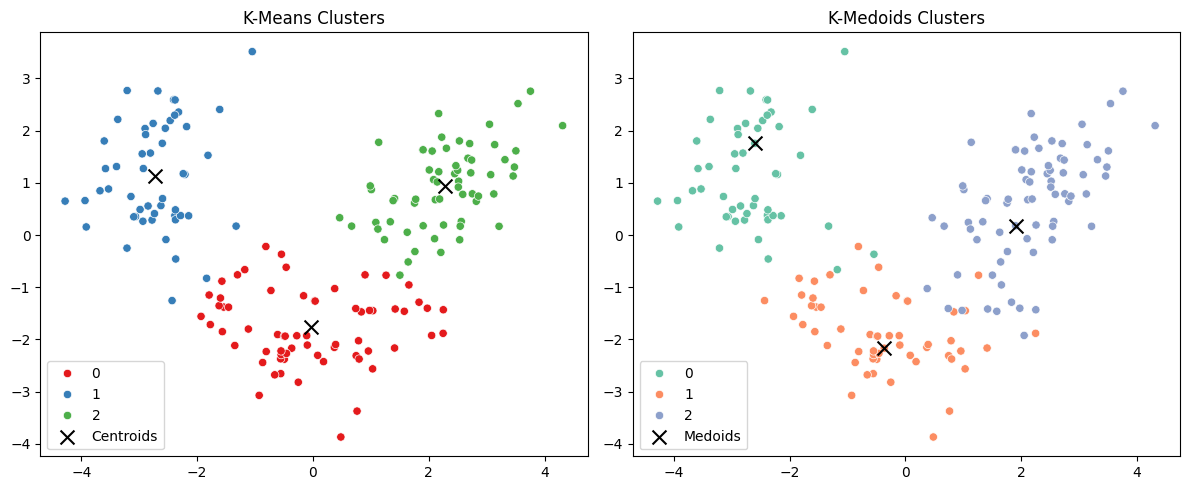

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
            pca.transform(kmeans.cluster_centers_)[:, 1],
            color='black', label='Centroids', marker='x', s=100)
plt.title("K-Means Clusters")
plt.legend()

# Plot K-Medoids Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmedoids_labels, palette='Set2')
plt.scatter(pca.transform(kmedoids.cluster_centers_)[:, 0],
            pca.transform(kmedoids.cluster_centers_)[:, 1],
            color='black', label='Medoids', marker='x', s=100)
plt.title("K-Medoids Clusters")
plt.legend()

plt.tight_layout()
plt.show()
